In [ ]:
pwd

In [1]:
import sys
try:
    import ujson as json
except ImportError:
    try:
        import simplejson as json
    except ImportError:
        import json

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import scipy
#from sklearn.preprocessing import MinMaxScaler
#import pywt
import os
from PIL import Image
# import tensorflow as tf
#from glob import glob

# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# from tensorflow.keras.models import Model,load_model,Sequential

# from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout,Flatten, Input
# from tensorflow.keras import backend as K
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
import os
img_path = 'CreatedImages/DY Images'
os.listdir(img_path)

['DY_event_10924.jpg',
 'DY_event_10925.jpg',
 'DY_event_10926.jpg',
 'DY_event_10927.jpg']

In [3]:
df = {}
data = []
for idx, x in enumerate(os.listdir(img_path)):
    #if x.isdigit() and idx < 3:
    print(x)
    data.append((img_path+ '/' + x , 1))

df = pd.DataFrame(data, columns=['filename', 'class'])
df['class'] = df['class'].astype(int)
df.head()

DY_event_10924.jpg
DY_event_10925.jpg
DY_event_10926.jpg
DY_event_10927.jpg


,filename,class
0,CreatedImages/DY Images/DY_event_10924.jpg,1
1,CreatedImages/DY Images/DY_event_10925.jpg,1
2,CreatedImages/DY Images/DY_event_10926.jpg,1
3,CreatedImages/DY Images/DY_event_10927.jpg,1


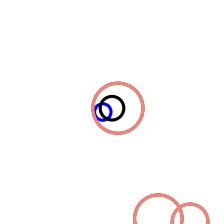

In [11]:
single_img_path = str(df['filename'][0])
Image.open(open(single_img_path, 'rb'))

In [33]:
import Augmentor
p = Augmentor.Pipeline('CreatedImages/DY Images')

# Add operations to the pipeline as normal:
p.rotate(probability=1, max_left_rotation=5, max_right_rotation=5)
p.flip_left_right(probability=0.5)
p.zoom_random(probability=0.5, percentage_area=0.8)
p.flip_top_bottom(probability=0.5)
p.shear(0.5, 20, 20)
p.skew(0.3)

output = p.sample(30)

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x232AA03C0B8

Initialised with 4 image(s) found.
Output directory set to CreatedImages/DY Images\output.

Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x232B0C00C50


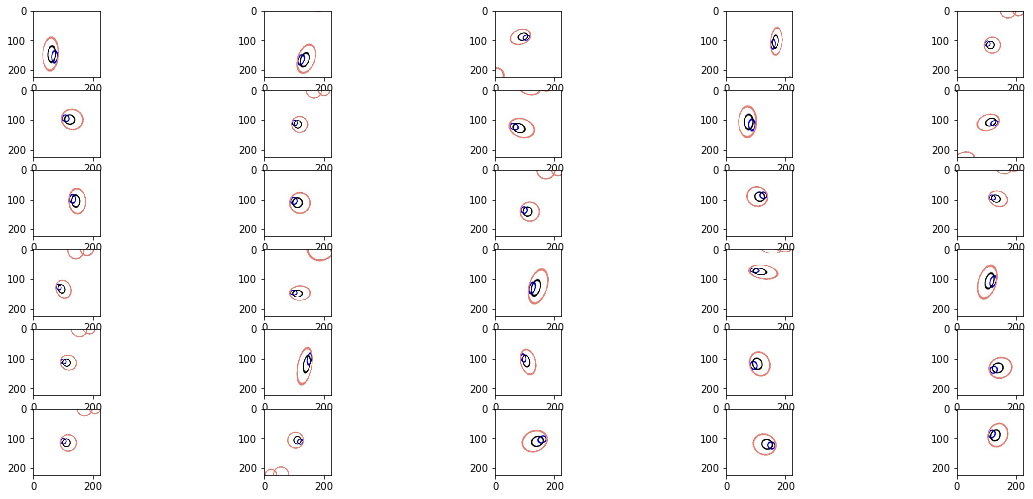

In [36]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

images = []
for img_path in glob.glob('CreatedImages/DY Images/output/*.jpg'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

In [32]:
import shutil
shutil.rmtree('CreatedImages/DY Images/output')